In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset using pandas
data = pd.read_csv('btc_historical_data.csv')

# Display the first few rows of the dataset for inspection
print("First few rows of the dataset:")
print(data.head())



First few rows of the dataset:
                  time      open      high      low    close      volumeto
0  2018-02-01 00:00:00  10226.86  10280.84  8726.95  9114.72  1.964309e+09
1  2018-02-02 00:00:00   9114.73   9147.93  7786.20  8870.82  2.768760e+09
2  2018-02-03 00:00:00   8872.87   9504.37  8194.68  9251.27  1.253485e+09
3  2018-02-04 00:00:00   9251.27   9400.99  7889.83  8218.05  1.413207e+09
4  2018-02-05 00:00:00   8218.05   8391.29  6627.31  6937.08  2.534149e+09


In [27]:
X_features = ['open', 'high', 'low', 'volumeto']
target_column = 'close'

# Extract features (X_train) and target (y_train)
X_train = data[X_features]
y_train = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1169, 4)
Shape of X_test: (293, 4)
Shape of y_train: (1169,)
Shape of y_test: (293,)


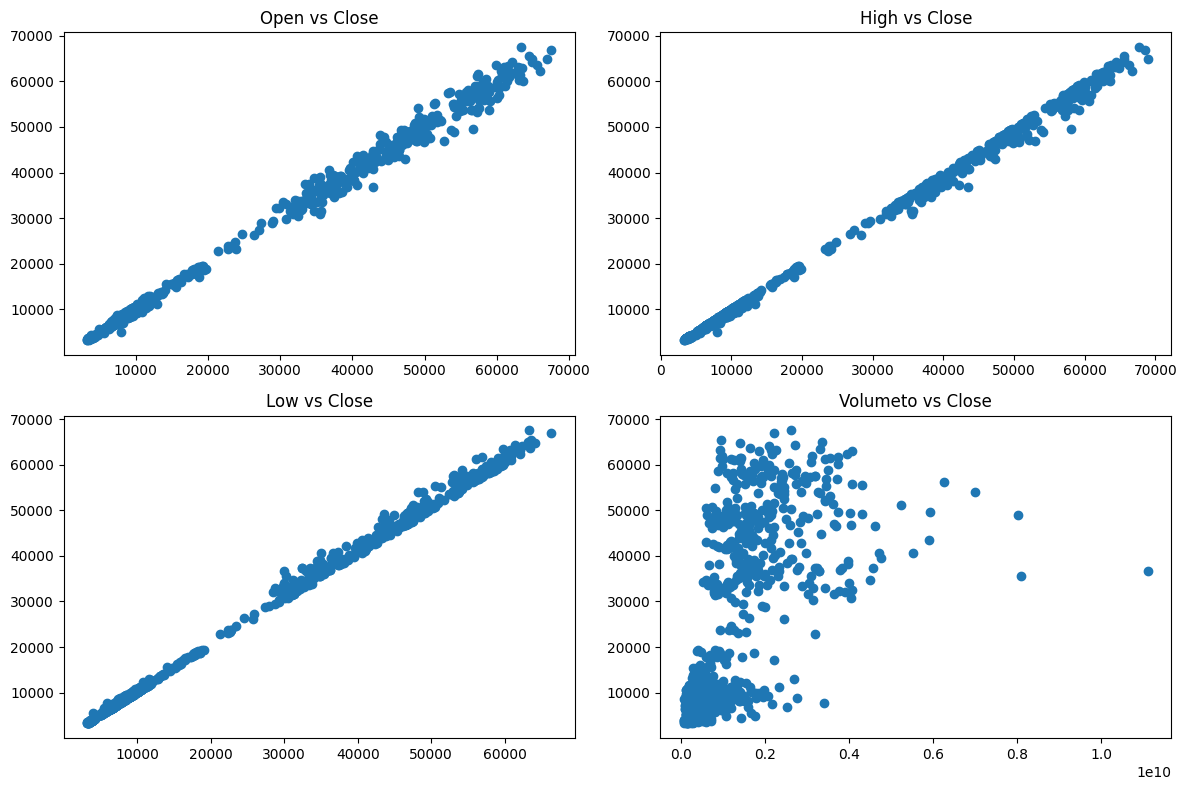

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(X_train['open'], y_train)
axs[0, 0].set_title('Open vs Close')

axs[0, 1].scatter(X_train['high'], y_train)
axs[0, 1].set_title('High vs Close')

axs[1, 0].scatter(X_train['low'], y_train)
axs[1, 0].set_title('Low vs Close')

axs[1, 1].scatter(X_train['volumeto'], y_train)
axs[1, 1].set_title('Volumeto vs Close')

plt.tight_layout()
plt.show()

In [29]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [30]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w}, b = {b}")

w = [-5.09760077e-01  8.54261119e-01  6.51442746e-01  5.43821377e-08], b = -12.374807820349815


In [31]:
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:5]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")

x_house = np.array([8872.87,9504.37,8194.68, 1253484523.4]).reshape(-1,4)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted closing value = {x_house_predict}")

Prediction on training set:
 [32536.14455815  9195.44124373  6935.53188197  3609.84258195
  4208.8905736 ]
prediction using w,b:
 1066    32536.144558
638      9195.441244
799      6935.531882
380      3609.842582
dtype: float64
Target values 
 1066    32203.64
638      9260.59
799      6876.49
380      3617.24
Name: close, dtype: float64
 predicted closing value = 8990.33605208319


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
